# Bayesian Statistics and MCMC...

A *very* brief intro to Bayesian Statistics for people who just want to use it to solve the Universe. Or those who think (correctly) that it's the cool kid in town.

*NOTE:* This presentation makes pretty heavy use of the awesome Jupyter notebook/actual book [Probabilistic Programming and Bayesian Methods for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers). 

<img height=400 width=600 src=bayesian-brain1.png>

## The Philosophy of Bayesian Inference

Bayesian Inference is:

* A way of assigning degree of *belief* to certain statements.
* Rarely are statements *certain*, they always have some degree of belief.
* Belief is *updated* by new evidence, in a rigorous way.
* Alternative to "traditional" *frequentist* view, which typically gives exact result.

Both frequentist and Bayesian viewpoints are useful, and *usually* give the same answer when the amount of data is very very large. Bayesian more natural if:

* Amount of data is small (which it *always* is).
* Probabilities of outcomes are required.
* Belief is being updated over time as evidence accumulates.

### Why Bayesian?

It is arguable that humans *tend* to think as Bayesians, and resort to standard frequentist approaches only out of training. While frequentists tend to ask what the data *should* be given an infinite number of trials, a Bayesian tends to ask how true a given statement is *given* the actual present data. Therefore it has these properties which make it quite natural, especially in astronomical research:

* It gears towards the probability of a statement (read "model") given the existence of a set of data (can't keep repeating trial runs of the Universe).
* It entirely naturally takes into account -- in a formalised way -- our *prior* knowledge/belief about a given model. 
* It assumes that we can never be certain about a statement, but we *can* specify how high our belief is in it, and continually update that belief as new evidence arrives.

### Priors

**Imagine the toss of a coin. Someone tosses the coin 5 times, revealing 5 heads. What happens next?**

<img src=poincare.jpg>

The second point is both crucial and interesting. Imagine the toss of a coin, as did Henri Poincare in his "Science and Hypothesis". Someone tosses the coin 5 times, revealing 5 heads. They then bet us some amount that in the next, say, 500 tosses, the number of heads will be twice the number of tails. A naive frequentist approach will tell us to take the bet, because over a large number of throws, the odds will even out to 50-50. However, this has automatically neglected our gut instinct, which is that since we don't know this person, we have no real way of determining how much we trust them, and whether they have brought a fair coin. Even upon noticing this flaw, all a frequentist can do is then presume that if there is some probability $p$ that the coin is fair, then the total fraction of heads will be $x$. A Bayesian, however, will ask: given the 5 throws I now know about, *and the fact that I don't know anything about the fairness of the coin*, what is the probability that the next 500 tosses will yield a given fraction of heads? In the process, the degree of belief about the fairness of the coin is consistently updated also. In addition, after each additional toss, you will be able to consistently update your belief in the final result. 

If instead you were playing with a trusted friend, you would naturally be far less disposed to believe that the coin is unfair. So what that it turned up heads 5 times in a row? These things can happen. This suggests that the result you get will be *subjective*. This is not a bad thing -- it is entirely natural. Bayesian statistics just gives us a way to formally deal with that subjectivity.

**Your instincts suggest, and Bayes confirms, that your estimation of your "friend" is an important factor to consider**


**This is a prior.**

## The Bayesian Framework



**Given a model $A$, how do we *update* our belief in $A$, given some data $D$?**

**Bayes' Theorem:**

$$ P(A|D) = \frac{P(D|A)P(A)}{P(D)}.$$

The Bayesian framework really comes down to a simple formula, known as Bayes' Theorem, which allows us to update probabilities (or degrees of belief). 

Let a statement about the Universe, or in other words, a particular model, be denoted $A$. We have some initial degree of belief of $A$: $P(A)$. Perhaps the model is that FRB's are alien signals. Then $P(A)$ might be very small. This is *somewhat* subjective, and depends on your own prior knowledge/dispositions. The more detail you can put in here the better, but usually it's impossible to nail down a precise or objective value for this. 

Now, let's say we have some data, $D$. These are things we've really measured. They could contain measurement uncertainties, but they're real actual instances of things that have happened. Then what we want, is the probability of our model $A$, given that we've observed $D$. And Bayes' formula gives us that.

* $P(A)$ is the *prior*.
* $P(A|D)$ is the *posterior*.
* $P(D|A)$ is the *likelihood*.
* $P(D)$ is the *marginal likelihood*.

The $P(A)$ we call the *prior*, because it encodes our prior belief of the model. The LHS we call the *posterior* because it encodes our belief of the model after the evidence. The $P(D|A)$ is the probability that the given data could be generated under model $A$, and $P(D)$ is probability of the data existing at all. 

This last bit is often stupidly hard to write down, which makes actually solving this equation often completely intractible. However, we can get away with this. Notice that what we want is the probability of $A$. But the denominator doesn't depend on $A$. We know the probability over all $A$ *must* be one, so we know that $P(X)$ must be equal to the integral over $A$ of $P(X|A)P(A)$. In effect, this is exactly what MCMC is -- a clever way to perform this integration. But we'll come to that soon.

### Example 1: Coin Toss (from book)

$$ P(A|D) = \frac{P(D|A)P(A)}{P(D)}.$$



$$ P(A) \sim {\rm Uniform}(0,1). $$

Imagine a series of coin tosses, where the coin *is* fair, but we don't know that. We want to assess the statement (or model) that the coin has probability $p$ to land on heads. Now, the initial probability, before any coin tosses, of the model, is a uniform distribution between 0 and 1. Likewise, the probability of the data, given a model $p$, is  

$$ P(D|A) = p^{N_h}(1-p)^{N_t}. $$

Finally the probability of getting any realisation of data is the total number of possible combinations:

$$P(D) = 2^{N_h+N_t}.$$

We can simulate such a process, and show the PDF of the LHS after some number of tosses (these plots will look different for every simulation, depending on the actual outcomes):

<img width=500 height=1000 src="coin_toss.png">

### Example 2: Simplest Gaussian

$$P(A=\mu) = {\rm constant}.$$

$$P(D|A=\mu) = \frac{1}{\sqrt{2\pi}\sigma^2} \exp(-\frac{(\vec{x} - \mu)^2}{2\sigma^2}). $$

$$P(D) = \int d\mu P(D|A=\mu) = 1.$$

So... 

$$P(\mu|D) = P(D|\mu)$$

Let's say we have a collection of observations that have no uncertainty in their measurement, perhaps heights of people in this room. Say that we have reason to believe that heights are drawn from a normal distribution (*we'd necessarily be wrong*) and also that we know the width of the distribution with certainty, but not the mean. In fact, we know *nothing* about the mean (also a completely rubbish assumption for this example). Then $P(A)$ is a constant, and doesn't change the shape of the posterior. $P(D|A)$ is necessarily a multivariate Gaussian distribution -- each height is independent, and has a probability drawn from a normal distribution. In this case, $P(D)$ must be unity, because a multivariate Normal is already normalised. Thus the *posterior* distribution is simply the MVN, with mean the mean of observations.

This unfortunately has an *improper* prior -- the prior itself integrates to infinity.

### Example 3: Unknown Spread.

$$P(\mu,\sigma) = \begin{cases} \exp\left(-\frac{(\mu-\mu_\mu)^2}{2\sigma_\mu^2}\right) & \sigma \in (a,b) \\
0 & {\rm otherwise} \end{cases}. $$

$$ P(D) = \int d\mu \int d\sigma \prod_i \frac{e^{-(h_i - \mu)^2/2\sigma^2}}{\sqrt{2\pi\sigma^2}} P(\mu,\sigma).$$

**Not analytically tractable! Where to from here?**

Now consider the same example, but in which we know neither the mean or standard deviation. Furthermore, let's state that our prior on the mean is a normal distribution with mean $\mu_\mu$ and std. dev. $\sigma_\mu$, and a uniform distribution on $\sigma$. It's possible that we don't even know these parameters, but let's assume we do.

The numerator is then the integral of this whole mess over both $\mu$ and $\sigma$. This is not even analytically tractable. So where to from here?


## MCMC

**Why not other possibilities?**
* Pure integration only works for low number of parameters, simple likelihood.
* Integration still doesn't give quantities of interest -- mean, median, mode, variance etc.
* Could just maximise $\mathcal{L}$ (reasonably quick), but only gives one point estimate.

For a reasonably simple problem like the previous Gaussian, we might be tempted to just do the integral numerically, using say Simpson's rule. This would work fine, as long as the likelihood function is reasonably well behaved. However, even with this (numerical) solution, it would be difficult to determine actual quantities of interest -- say the mean, median, mode, variance etc. of the distribution. All you can get is the probability at any point individually, by doing a 2D integral. 

If the number of parameters increases, the curse of dimensionality kicks in -- with $N$ parameters, and a grid of $N_g$ steps in each dimension, the integral requires $N_g^N$ evaluations of the likelihood. This very quickly gets out of hand, especially for expensive likelihoods. 

Alternatively, if we *only* care about the mode of the distribution -- often a pretty good estimate of the centre, but not always -- then we could just maximise $\mathcal{L}$ -- i.e. modify the parameters $\mu$ and $\sigma$ under some optimization scheme, until $\mathcal{L}$ hits its maximum value, then read off the parameter values. This is called the Maximum Likelihood method. It is reasonably fast, but only gets you one kind of point of the distribution, which may or may not be useful.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

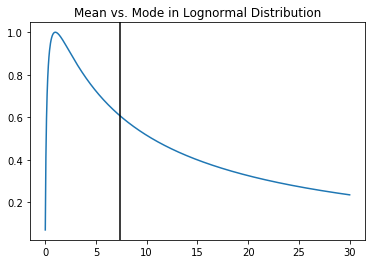

In [53]:
x = np.linspace(0.01,30,1000)
plt.plot(x, np.exp(-(np.log(x) - 0.0)**2/(2*2.0**2)))
plt.axvline(np.exp(0 + 2**2/2.), color='k')
plt.title("Mean vs. Mode in Lognormal Distribution");

### Why MCMC?

#### MCMC is a smart integrator

* Scales ~$N$ rather than ~$x^N$. 
* *Samples* the space.
* Samples provide *very easy* way of getting posterior estimates (mean, median, variance etc.)
* Represents entire multi-variate dist. of posterior.

**MCMC Continued...**

MCMC is just a smart way of performing the integration. It works by creating a formally correct *sampling* of the posterior. In this way, the need for normalisation is entirely circumvented. The mean, median, mode etc. are available for free by just computing them on the sample. In short, it can be sliced and diced any way we wish -- it represents the entire multi-variate distribution of the posterior.

**How it works.** 

An MCMC basically "tests out" different combinations of parameters -- just like maximum likelihood -- but instead of just bolting for the maximum, it remembers a single combination (a "step") with a probability given by its relative probability to the previous step. For example, imagine for the first combination, the posterior probability is 0.1. For the second step (which it chooses randomly*), the probability is 0.2. Then we will definitely remember this step. If the probability was 0.05, then we would remember it with probability of 0.05/0.1 = 0.5. 

Thus we always accept higher-probability steps, and sometimes accept lower ones. This has been proven to result in a sample which follows the posterior distribution (if left for an infinite amount of time).*

### How MCMC Works

**Proto-typical algorithm (metropolis-hastings):**

1. Choose set of parameters $\theta_0$
2. Evaluate $P(\theta_0|D)$
3. Choose $\theta_1$ (and evaluate $P(\theta_1|D)$).
4. If $P(\theta_1|D)>P(\theta_0|D)$, keep $\theta_1$ and set $\theta_0=\theta_1$ (repeat)
5. Else If $P(\theta_1|D)<P(\theta_0|D)$, keep with probability $P(\theta_1|D)/P(\theta_0|D)$, otherwise discard and try again.


#### Properties of MCMC

**Irrelevance of the tricky term:**

$$ \frac{P(D|A_1) P(A_1)}{P(D)} / \frac{P(D|A_2)P(A_2)}{P(D)} \equiv \frac{P(D|A_1) P(A_1)}{P(D|A_2) P(A_2)}. $$

**Memoryless**

Algorithm only cares about current and next steps, does not "remember" previous steps (Markov Chain).

**Choice of Step**
* Some conditions (i.e. symmetry)
* *Lots* of methods out there. 
* The primary way of making "better" or "worse" MCMC routines.
* Performance is problem-specific.
* Eg. ``emcee``, ``Stan`` and ``PyMC3`` offer different step methods.
* **WRITE YOUR OWN!!**

## *Doing* MCMC

* Never use your own step method, better ones exist.
* Two general ways of doing the "mechanics":
    1. Black-box
    2. Probabilistic Programming.
    
**General Workflow:**
1. Specify model (i.e. $\ln P(D|A)$)
2. Specify (log) priors 
3. Specify starting values.
4. Specify number of iterations you want to sample.
5. Pass all these to the MCMC machine.
6. Assess whether returned chains are converged.
7. Make some plots and summary statistics.

Steps 1 and 2 are dependent on what kind of code you're using ('black box' or 'probabilistic programming').

Now, never use your own MCMC step method in the real world. Use something like ``PyMC3`` or ``emcee`` or ``Stan``. Of course, the actual mechanics of how to do things in each of these is slightly different. But in each case, similar things will be needed, at a conceptual level. 

You'll always need to specify the likelihood, $\mathcal{L}$. In fact, usually, you'll just need the log-likelihood, which is usually easier to calculate. Internally, the MCMC step method will find $\mathcal{L}_1/\mathcal{L}_2$ as $e^{\ln\mathcal{L}_1 - \ln \mathcal{L}_2}$, which is more numerically stable. So usually, you'll have some kind of code like this:

### Example: Black-box

In this kind of code, all you need to define is a single function which takes data and parameters, and spits out the log of the posterior. Everything inside the function is up to you. ``emcee`` is an example. 

A general setup may look like this:

In [ ]:
def log_prob_data_given_model(model_parameters, data):
    ...
    return log_prob

def log_prior(model_parameters):
    return log(norm(model_parameters))

def lnL(model_parameters, data):
    return log_prob_data_given_model(model_parameters, data) + log_prior(model_parameters)

big_chain = call_mcmc(initial_param_values,
                      data,
                      lnl_function = lnL,
                      n_iterations)

ensure_converged(big_chain)

print(summary(big_chain))

plot(big_chain)

The ``big_chain`` will consist of an array of values, where each parameter has an individual "trace" which is ``n_iterations`` long. You can take the mean of these values, or plot their histogram, or do whatever you want. The whole distribution, with all its covariance, is locked away in this chain.

## Practical Concerns

### Constructing a Likelihood

* The guts of doing Bayesian stats.
* How to construct the ``log_prob_data_given_model()`` function?

Given that you know how to use whatever machine you want to perform the MCMC, the biggest hurdle is constructing the likelihood function. The choice of prior *can* be tricky, but *usually* it will be a bounded uniform distribution, or a normal distribution. The really hard part is constructing the ``log_prob_data_given_model`` part. How to think about this?

**Consider a *generative model***

* How would you generate the data itself?
* Track each step of the stochastic process, specify each assumption.

#### Example: Dark Matter Haloes (I)

\begin{align}
m &\sim {\rm Gamma}(\alpha, \beta) \\
m_{\rm obs} &\sim {\rm LogNorm}(\mu=m, \sigma = A m^{-\gamma}).
\end{align}

***Not* fully specified!**

Usually the best way to do this is to construct a *generative model*. Ask yourself how the data itself could have been generated (with code) from the ground up. We can build up quite complicated models in this way. For example, to generate data representing the masses of some dark matter haloes, we might suggest that intrinsically, the masses are drawn from a gamma distribution, for which we do not know the parameters. But each of the intrinsic masses are scattered upon observation, and thus are drawn from a log-normal distribution, whose width may depend on the intrinsic mass. You'd construct that data according to the following:

\begin{align}
m &\sim {\rm Gamma}(\alpha, \beta) \\
m_{\rm obs} &\sim {\rm LogNorm}(\mu=m, \sigma = A m^{-\gamma}).
\end{align}

#### Example: Dark Matter Haloes (II)

**Gotta get our parameters from somewhere:**

\begin{align}
\alpha &\sim {\rm Uniform}(0,1) \\
\beta &\sim {\rm Uniform}(0,2) \\
A &\sim \mathcal{N}(100,3) \\
\gamma &\sim \mathcal{N}(0,1)\\
m &\sim {\rm Gamma}(\alpha, \beta) \\
m_{\rm obs} &\sim {\rm LogNorm}(\mu=m, \sigma = A m^{-\gamma}).
\end{align}

This does not, actually, absolutely define the data. Each of $\alpha,\beta,A$ and $\gamma$ need to be specified somehow. To generate the data, we could literally just specify each of these as a constant. But then the model would be completely determined, and we would know everything! Otherwise, we could draw each of these from some distribution.

This is now fully self-contained. The first four lines define the *priors* on our parameters, and the last two define the data model. 

#### Example: Dark Matter Haloes (III: Going too far)

**Nothing stops us from drawing parameters from distributions with parameters from distributions from ...**

\begin{align}
a &\sim {\rm Uniform}(0,1) \\
\alpha &\sim {\rm Uniform}(0,a) \\
\beta &\sim {\rm Uniform}(0,2) \\
A &\sim \mathcal{N}(100,3) \\
\gamma &\sim \mathcal{N}(0,1)\\
m &\sim {\rm Gamma}(\alpha, \beta) \\
m_{\rm obs} &\sim {\rm LogNorm}(\mu=m, \sigma = A m^{-\gamma}).
\end{align}

**At some point, it makes no difference, so just stop.**

Then $\alpha$  is derived from $a$. Here $a$ is called a *hyper-parameter* -- it is the parent of another parameter. In fact, you can see that $\alpha$ and $\beta$ are hyper-parameters of the parameter $m$. It doesn't really matter so long as the whole thing produces something that resembles the data you actually have. 

#### Example: Dark Matter Haloes with "black box"

The generative model can be directly turned into the function we require (in python speak):

In [35]:
from scipy.stats import norm, gamma, uniform, lognorm

def lnL(model_parameters, data):
    alpha,beta,A,gamma, m_intrinsic = model_parameters
    
    lnL = 0
    
    lnL += np.log(uniform(0,1).pdf(alpha))
    lnL += np.log(uniform(0,2).pdf(beta))
    lnL += np.log(norm(100,3).pdf(A))
    lnL += np.log(norm(0,1).pdf(gamma))

    lnL += np.sum(np.log(gamma(alpha,beta).pdf(m_intrinsic)))
    lnL += np.sum(np.log(lognorm(m_intrinsic, A*m_intrinsic**-gamma)))
    
    return lnL

Smart MCMC libraries/languages will actually be able to take the model you give it, and either fit with it, *or* produce samples with it. It can run both ways. This can be a good indication as to whether you're getting your model correct. 

#### Example: Dark Matter Haloes with Probabilistic Programminc (``PyMC3``)


Most people in astronomy seem to use ``emcee`` (me included). The good thing about it is that something like our function above just works with ``emcee`` -- all it needs is a function that returns some value which is the log-likelihood. And it has a pretty good step method. 

But other languages exist which are more intuitive if you come at it from a statistical viewpoint, and give you more built-in options to assess how good your fits are etc. One of these is PyMC. I won't go into detail about how to use it, but as an example, in PyMC you'd construct the previous model like this:

In [ ]:
import pymc3 as pm

data = <read_in_observed_masses>
with pm.Model() as model:
    # Simple parameters
    alpha = pm.Uniform("alpha", lower=0, upper=1)
    beta = pm.Uniform("beta", lower=-1, upper=1)
    A = pm.Normal("A", mean=100, sd=3.)
    gamma = pm.Normal("beta", mean=0, sd=1)
    
    # The intrinsic masses (really just a bunch of parameters)
    m_intrinsic = pm.Gamma("m_intrinsic", alpha=alpha, beta=beta, shape=len(data))
    
    # The observed masses (set to being observed as data)
    m_observed = pm.Normal("m_observed", mu = np.log(m_intrinsic), sd = 3., observed=data)

That's it. Then you use ``PyMC3`` to run the model for some number of iterations and plot the results. 

#### Full Example: Heights with ``PyMC3``

Let's revisit the people's height example. We can write a generate data function, and create the model quite easily:

In [1]:
import pymc3 as pm
import numpy as np

def generate_data(N):
    mean = 1.7
    sd = 0.2
    return np.random.normal(loc=mean, scale=sd, size=N)

data = generate_data(150)

with pm.Model() as model:
    mean = pm.Normal("mean", mu = 1.4, sd = 0.5, testval=1.3)
    sd = pm.Uniform("sd", lower=0.05, upper=0.3, testval = 0.06)
        
    heights = pm.Normal("heights", mu=mean, sd=sd, observed=data)
    
    step = pm.Metropolis()
    chains = pm.sample(20000, step=step, njobs=4)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sd_interval__]
>Metropolis: [mean]
100%|██████████| 20500/20500 [00:04<00:00, 4141.63it/s]
INFO (theano.gof.compilelock): Waiting for existing lock by process '15792' (I am process '15793')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/steven/.theano/compiledir_Linux-4.15--ARCH-x86_64-with-arch--3.6.4-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '15792' (I am process '15794')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/steven/.theano/compiledir_Linux-4.15--ARCH-x86_64-with-arch--3.6.4-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '15793' (I am process '15794')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/steven/.theano/compiledir_Linux-4.15--ARCH-x86_64-with-arch--3.6.4-64/lock_dir
The number of effective samples is smaller than 25% for some parameters.


### Diagnosing Convergence

#### Burn-in
* Chains may not start "in" the posterior, and take time to truly get inside it.
* This period known as burn-in.

Can heuristically identify:

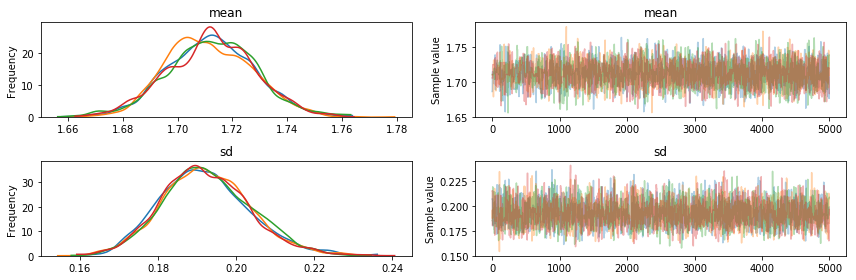

In [2]:
pm.traceplot(chains[:5000]);

**Rule-of-thumb is cut out first half.**

In [3]:
# Get rid of first half of samples to "burn in"
chains = chains[10000:]

#### Correlation of Samples

* Close samples are correlated
* Can perform "thinning", but usually no need to (numbers outweight correlation).

Check out how many samples you need before you remove correlation:

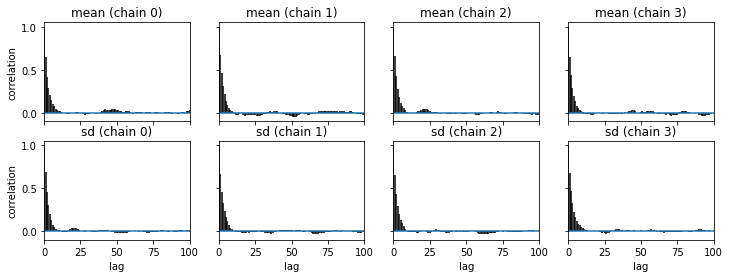

In [4]:
pm.plots.autocorrplot(chains);

#### Number of samples

Two popular options exist:
    1. Integrated auto-correlation time (``emcee``'s preferred option)
        * Use ~$50\tau$ samples
    2. Gelman-Rubin statistic (good when you have multiple chains)
        * Ensure $\hat{R}<1.01$


Samples close to each other will likely be correlated, which could bias things. Some people recommend "thinning", i.e. only keeping every $n^{th}$ sample. Other people say there's no point -- the sheer weight of samples will outweigh the correlation. You can thin if the number of samples will be too large in terms of memory.

In [5]:
pm.summary(chains)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mean,1.711667,0.015686,0.000168,1.681214,1.742864,8221.0,1.000181
sd,0.192369,0.011328,0.000120,0.171429,0.215154,7712.0,1.000096


### Interpreting an MCMC chain

**Key difference to single-point estimators (eg. chi-square minimization) is that the posteriors per parameters are *marginal*.**
* Other parameters are *integrated over*
* Provides final distribution for that parameter, given complete uncertainty of all other parameters.
* Joint-marginalised PDF for two parameters shows covariance.


There are lots of tools out there to interpret the chains from an MCMC. The thing to keep in mind, at an abstract level, is what sets these chains apart from other methods, like chi-square minimization. Looking at the distribution of a single parameter in the chain is equivalent to looking at the posterior *marginalised* (or integrated) over every other parameter. It is the actual final distribution for that parameter you'd expect, given the complete uncertainty of all other parameters, and how they affect it. Likewise, if you integrate over all parameters bar two, you get the joint-marginalised PDF of those parameters, which is helpful for detecting covariance.


**Some useful summary plots are 1D histograms/KDEs**

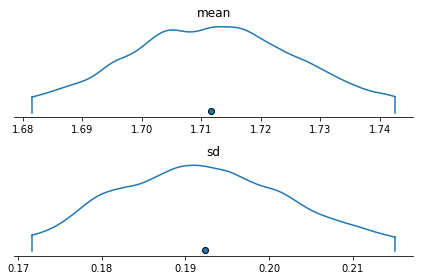

In [6]:
pm.plots.densityplot(chains);

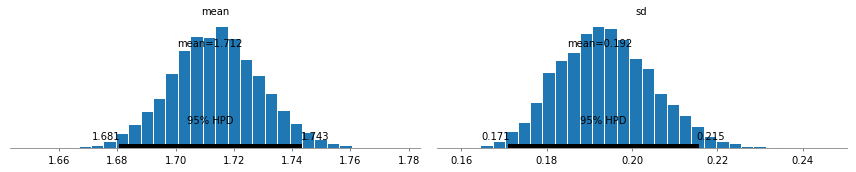

In [7]:
pm.plot_posterior(chains);

One of the most highly useful plots to make from an MCMC run is the so-called "corner" plot. Packages like ``corner`` and ``ChainConsumer`` can make these plots for you (eg. chainconsumer):

<img height=500 width=500 src="chainconsumer.png">

## Tips

After actually creating the likelihood model, the most energy-consuming part of doing MCMC is making sure it's telling you something useful. Lots of things can go wrong, even if your model is correct, and we've hinted at a few already:

* your model could be incorrect
* your prior could be poor
* how do you know if your model is a good one?


### Model Correctness

* Usually can't say if model is definitely "correct"
* *Can* say it is definitely *incorrect.*

**Usually comes down to choosing wrong kind of distribution, eg.:**

* if the variable is bounded above 0 (or some other threshold). Then the Gaussian *must* be wrong. Try a log-normal.
* if the variable is discrete (or some scaling of a discrete number). Then the Gaussian *must* be wrong. Try a Poisson, or something similar.
* if the variable is skewed, try a distribution that can be skewed (eg. lognormal). 

**Correctness of Models**

It is usually impossible to say that your model is definitely "correct". However, it is often easy to say whether it is definitely *incorrect*. Often, this can come down to using the wrong kind of distribution for a particular variable. 

We are so used to using chi-square that we sometimes forget it really only applies to Gaussian variables (it is literally the log of the Gaussian distribution). Lots of realistic variables are pretty close to Gaussian, so even if it is untrue in detail, we might get away with it. But there can be catastrophic failures. 

Places where this may more obviously turn up are:



In general, the model should mimic the coarse behaviours of the data, and should definitely have zero density where the data cannot possibly be. Remember, MCMC looks around parameter space, and so it will very possibly try out values that you don't expect.



### Priors

Two bad things to do with priors:

**1. Not specify one at all**

* By default, prior is uniform over entire real line.
* This is 
    1. Improper
    2. Almost never true
    3. Not what you think it is, in high dimensions
    4. Covering up information in the model.

**2. Not testing its impact.**

* Priors *are* subjective, which is good.
* We'd like the data to dominate the prior.
* Should explicitly test for this.

**Priors**

There are two really bad things to do with priors:
1. Not specify one at all,
2. Not test the prior's impact.

If a prior is not specified, it is by default a uniform prior over the whole real line. This has a few problems -- firstly, it is improper (integrates to infinity) and may result in some weird behaviour. Secondly, it is almost never true. Almost always you know that a value can't be 1e6 times what you expect. Remember, there is always implicitly a prior, and assuming a uniform prior by default is not necessarily very close to the truth. Thirdly, a uniform prior doesn't do what you think it should in high dimensions. A uniform box, for example, has very little relative volume in the corners. Fourthly, by not explicitly specifying it, you are not conceptually aware that the prior is an essential ingredient of the posterior -- and no-one else is either.

On the other hand, specifying a prior is of course subjective. We hope that the data is sufficient to dominate the posterior, regardless of the prior, but this may not be true. It is always useful to choose a few priors -- some wide, some narrow, to see what effect they have on the posterior. A prior-dominated result could indicate a lack of data, or it could just be that that's the correct interpretation. Either way, it's good to be explicit about its effect.



### Is the model a good one?

* Ability to find best parameters does *not* imply a good model was chosen.
* Check heuristically by generating data from posterior (not just at best parameters).
* Similar to plotting best-fit curve against data.

If a finite number of different models are known about/under consideration, they can be more formally compared. *This is not trivial, and you'll have to do more reading yourself.* Basic ideas:

* Domain of Bayesian Model Selection.
* Bayes' is very natural way to answer this question, with in-built "Occams Razor".
* Requires the other factor we ignored ($P(D)$), called the "Bayes Factor":

$$ B = \frac{P(M_1)}{P(M_2)} \frac{\int d\theta_1 f(D|\theta_1) P(\theta_1)}{\int d\theta_2 f(D|\theta_2) P(\theta_2)}. $$

* B>1 supports $M_1$.
* Very tricky to calculate, but supported in principle in ``PyMC3``.

**Is my model a good one?**

Just because you get the best model parameters, doesn't mean the model itself is good. The obvious way of determining this, at least heuristically, is to generate some data using your best parameters, and see how well it lines up with the data you actually have. For something like a curve fit, this amounts to plotting the best-fit curve against the data. But each problem will have its specific way of doing this.

The other question you can ask is: given some selection of models, each of which I can find the best parameters for, which is the best? This is the domain of Bayesian Model Selection. There are various resources out there to help do this. In short, Bayes' is a natural way to answer these questions, via the factor we've been conveniently ignoring: the $P(D) = \int dA P(D|A)P(A)$. Specifically, how much better model 1 is than model 2 can be summarised by the Bayes Factor:

$$ B = \frac{P(M_1)}{P(M_2)} \frac{\int d\theta_1 f(D|\theta_1) P(\theta_1)}{\int d\theta_2 f(D|\theta_2) P(\theta_2)}. $$

The Bayes Factor naturally penalises larger degrees of freedom in the model.

#### Example: Height Example Model Comparison

We need to use a different step method (Sequential Monte Carlo, SMC):

In [47]:
from pymc3.step_methods import smc

with model:
    smc_trace = smc.sample_smc(n_steps=2000,
                               n_chains=100,
                              n_jobs=1, homepath='/home/steven/Documents/TutesAndLectures/')

/home/steven/miniconda3/envs/pymc3/lib/python3.5/site-packages/pymc3/step_methods/smc.py:491: UserWarning: Warning: SMC is an experimental step method, and not yet recommended for use in PyMC3!
  warnings.warn(EXPERIMENTAL_WARNING)
Argument `step` is None. Auto-initialising step object using given/default parameters.
/home/steven/miniconda3/envs/pymc3/lib/python3.5/site-packages/pymc3/step_methods/smc.py:119: UserWarning: Warning: SMC is an experimental step method, and not yet recommended for use in PyMC3!
  warnings.warn(EXPERIMENTAL_WARNING)
Using present model likelihood!
Removing previous sampling results ... /home/steven/Documents/TutesAndLectures/stage_0
Init new trace!
Sample initial stage: ...
Beta: 0.000000 Stage: 0
Initialising chain traces ...
Sampling ...
Beta: 0.022719 Stage: 1
Initialising chain traces ...
Sampling ...
Beta: 0.053295 Stage: 2
Initialising chain traces ...
Sampling ...
Beta: 0.100511 Stage: 3
Initialising chain traces ...
Sampling ...
Beta: 0.367959 Stage

Now run a second model, which assumes a Student-T distribution with unknown shape, $\nu$:

In [50]:
with pm.Model() as model2:
    mean = pm.Normal("mean", mu = 1.4, sd = 0.5)
    sd = pm.Uniform("sd", lower=0.05, upper=0.3)
    nu = pm.Uniform("nu", lower=0.05, upper=5)
    
    heights = pm.StudentT("heights", nu=nu, mu=mean, sd=sd, observed=data)
    
    smc_trace = smc.sample_smc(n_steps=2000,
                               n_chains=100,
                               n_jobs=1, homepath='/home/steven/Documents/TutesAndLectures/model2')

/home/steven/miniconda3/envs/pymc3/lib/python3.5/site-packages/pymc3/step_methods/smc.py:491: UserWarning: Warning: SMC is an experimental step method, and not yet recommended for use in PyMC3!
  warnings.warn(EXPERIMENTAL_WARNING)
Argument `step` is None. Auto-initialising step object using given/default parameters.
/home/steven/miniconda3/envs/pymc3/lib/python3.5/site-packages/pymc3/step_methods/smc.py:119: UserWarning: Warning: SMC is an experimental step method, and not yet recommended for use in PyMC3!
  warnings.warn(EXPERIMENTAL_WARNING)
Adding model likelihood to RVs!
Init new trace!
Sample initial stage: ...
Beta: 0.000000 Stage: 0
Initialising chain traces ...
Sampling ...
Beta: 0.021525 Stage: 1
Initialising chain traces ...
Sampling ...
Beta: 0.043847 Stage: 2
Initialising chain traces ...
Sampling ...
Beta: 0.069443 Stage: 3
Initialising chain traces ...
Sampling ...
Beta: 0.138636 Stage: 4
Initialising chain traces ...
Sampling ...
Beta: 0.302558 Stage: 5
Initialising cha

Compare marginal likelihoods (i.e. get the Bayes Factor):

In [51]:
model.marginal_likelihood/model2.marginal_likelihood

17.668814320416594

**Note: it's unclear how robust this result is. Take with a grain of salt.**

## Conclusions

#### Some useful resources

* [PyMC3 Docs](docs.pymc.io/notebooks/getting_started.html)
* [emcee docs](http://dfm.io/emcee/current/user/line/)
* [Probabilistic Programming and Bayesian Methods for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)
* [Stan Docs](https://github.com/stan-dev/stan/releases/download/v2.17.0/stan-reference-2.17.0.pdf)


#### Some good exercises

1. Write your own Metropolis-Hastings algorithm.
2. Try something like the height's example in this presentation.
3. What is the log-likelihood for a set of data points which follow an arbitrary 1D model: $y = f(x) + \mathcal{N}(0, \sigma)$? (i.e. where each point has Gaussian noise?), and what is it equivalent to?
4. Write down the likelihood for a similar problem to (3), but where there may be some observational uncertainty on $x$.